In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import HuberRegressor

from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

from sklearn.metrics import r2_score

data = pd.read_csv('./src/USA_cars_datasets.csv')

def plot(x, x2, y, y1, y2, y3, y4, label1, label2, label3, label4):
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.xlabel('Year')
    plt.ylabel('Mileage')
    plt.title('Mileage by year')
    plt.plot(x, y1, color='r', label = label1)
    plt.plot(x, y2, color='g', label = label2)
    plt.plot(x, y3, color='r', label = label3)
    plt.plot(x2, y4, color='g', label = label4)
    plt.legend()

В данном разделе посравниваем различные регрессии. Для оценки будем коэффициент детерминации. 

Коэффициент детерминации (R-квадрат) — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии в дисперсии зависимой переменной. 

В качестве зависимости снова возьмем в качестве зависимой переменной пробег авто, а в качестве независимой переменной - год выпуска авто.

Linear R2:  0.27711163617217627
Ridge R2:  0.2872090224439625
Huber R2:  -0.03784339892336397
Polynomial R2:  0.39569657402991343


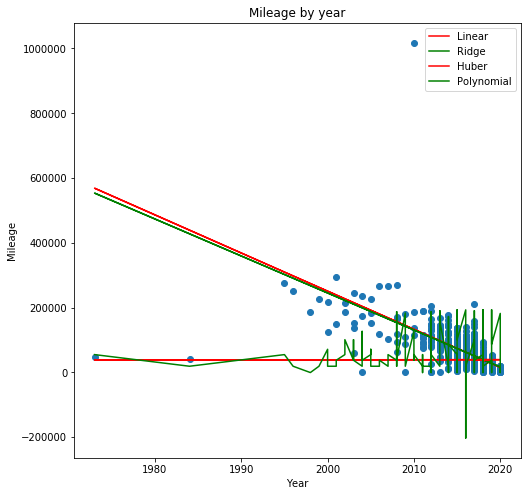

In [71]:
x = data.year.values
y = data.mileage.values

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=50)

model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
model2 = Ridge(alpha=500.5).fit(x_train.reshape(-1, 1), y_train)
model3 = HuberRegressor(alpha=1.0).fit(x_train.reshape(-1, 1), y_train)

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))
model4 = LinearRegression().fit(x_poly, y_train)

y_pred = model.predict(x_test.reshape(-1, 1))
y_pred2 = model2.predict(x_test.reshape(-1, 1))
y_pred3 = model3.predict(x_test.reshape(-1, 1))
y_pred4 = model4.predict(poly_reg.fit_transform((x_test).reshape(-1, 1)))

plot(x_test, np.sort(x_test).reshape(-1, 1), y_test, y_pred, y_pred2, y_pred3, y_pred4, 'Linear', 'Ridge', 'Huber', 'Polynomial')

print('Linear R2: ', r2_score(y_test, y_pred))
print('Ridge R2: ', r2_score(y_test, y_pred2))
print('Huber R2: ', r2_score(y_test, y_pred3))
print('Polynomial R2: ', r2_score(y_test, y_pred4))

Очистим данные от аномалий

In [89]:
# x = data.year.values
# y = data.mileage.values

# def find_anomalies(data):
#     anomalies = []
#     data_std = np.std(data)
#     data_mean = np.mean(data)
#     anomaly_cut_off = data_std * 8
    
#     lower_limit  = data_mean - anomaly_cut_off 
#     upper_limit = data_mean + anomaly_cut_off
#     print(lower_limit)

#     for outlier in data:
#         if outlier > upper_limit or outlier < lower_limit:
#             anomalies.append(outlier)
#     return anomalies

# print(len(find_anomalies(x)))

# anomalies = find_anomalies(x)

# cleaned_data =  data.loc[~data['year'].isin(anomalies)]
# cleaned_x = cleaned_data['year'].values
# cleaned_y = cleaned_data['mileage'].values

clf = LocalOutlierFactor(n_neighbors=4)
predict = clf.fit_predict(x.reshape(-1, 1), y.reshape(-1, 1))

outline_indexes = np.where(predict == -1)
normal_indexes = np.where(predict == 1)

cleaned_x = x[normal_indexes]
cleaned_y = y[normal_indexes]

Linear R2:  0.6236855225632657
Ridge R2:  0.6195581492058571
Huber R2:  -0.07258193046155648
Polynomial R2:  0.5640871195402655


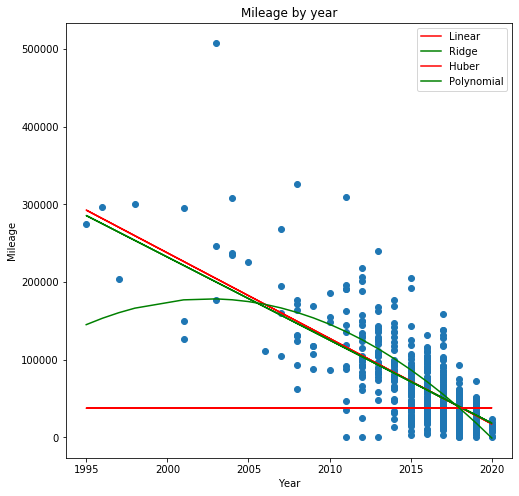

In [90]:
x_train, x_test, y_train, y_test= train_test_split(cleaned_x, cleaned_y, test_size=0.4, random_state=50)

model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
model2 = Ridge(alpha=500.5).fit(x_train.reshape(-1, 1), y_train)
model3 = HuberRegressor(alpha=1.0).fit(x_train.reshape(-1, 1), y_train)

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))
model4 = LinearRegression().fit(x_poly, y_train)

y_pred = model.predict(x_test.reshape(-1, 1))
y_pred2 = model2.predict(x_test.reshape(-1, 1))
y_pred3 = model3.predict(x_test.reshape(-1, 1))
y_pred4 = model4.predict(poly_reg.fit_transform((x_test).reshape(-1, 1)))
plot(x_test, np.sort(x_test).reshape(-1, 1), y_test, y_pred, y_pred2, y_pred3, cleaned_y_predicted, 'Linear', 'Ridge', 'Huber', 'Polynomial')

print('Linear R2: ', r2_score(y_test, y_pred))
print('Ridge R2: ', r2_score(y_test, y_pred2))
print('Huber R2: ', r2_score(y_test, y_pred3))
print('Polynomial R2: ', r2_score(y_test, y_pred4))